In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/moshida/EUVlitho


In [2]:
from elitho.mask_pattern import LinePattern
from elitho import const
from elitho import fourier

mask = LinePattern(cd=80, gap=60, direction="V", field_type="DF")(const.NDIVX, const.NDIVY)

/home/moshida/.pyenv/versions/3.12.11/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


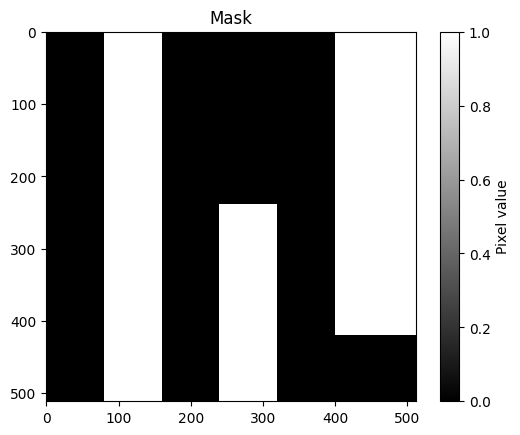

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(mask, cmap='gray', interpolation='nearest')
plt.title("Mask")
plt.colorbar(label="Pixel value")
plt.show()

In [4]:

from elitho.intensity import intensity

intensity_map = intensity(mask)

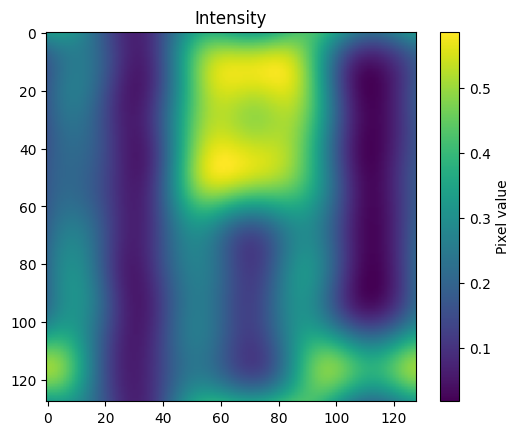

In [5]:
from matplotlib import pyplot as plt
plt.imshow(intensity_map)
plt.title("Intensity")
plt.colorbar(label="Pixel value")
plt.show()

In [6]:
intensity_map

array([[0.36356963, 0.37616149, 0.3882002 , ..., 0.32487583, 0.33769248,
        0.350667  ],
       [0.34582594, 0.35870797, 0.37103167, ..., 0.30627781, 0.3193733 ,
        0.33263343],
       [0.32802542, 0.34122696, 0.35386794, ..., 0.28755392, 0.30094796,
        0.31451677],
       ...,
       [0.41354853, 0.42545321, 0.43683088, ..., 0.37694266, 0.38906769,
        0.401344  ],
       [0.39770654, 0.40981067, 0.42137815, ..., 0.36048608, 0.37281595,
        0.38529781],
       [0.38095883, 0.39329143, 0.40507836, ..., 0.34304231, 0.35560305,
        0.36831768]], shape=(128, 128))

In [7]:

from elitho.intensity import intensity

new_intensity_map = intensity(mask)

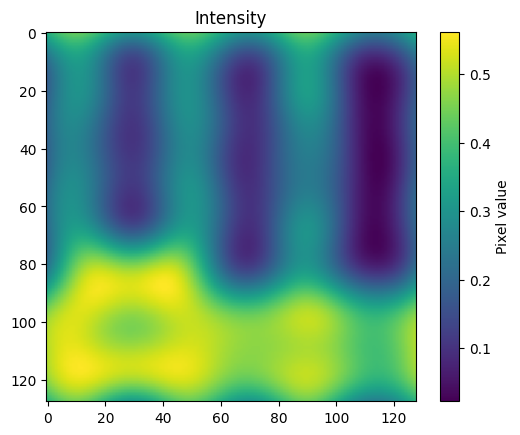

In [8]:
from matplotlib import pyplot as plt
plt.imshow(new_intensity_map)
plt.title("Intensity")
plt.colorbar(label="Pixel value")
plt.show()

In [9]:
import numpy as np
np.all(new_intensity_map == intensity_map)

np.True_